In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas_profiling
import graphviz

# Import Data
Load data into Pandas Dataframe

In [2]:
df = pd.read_csv('Temperature_Data.csv')
df.head()

,Temperature,Anomaly
0,43,0
1,27,0
2,31,0
3,6,0
4,33,0


In [3]:
df.profile_report()

In [4]:
y = df.pop('Anomaly')

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

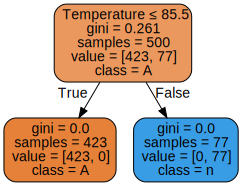

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=df.columns,  class_names=y.name,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Creating Training Data
We start out by creating temperature data: 500 random values between 0 and 100, then label that data according to the rule: if the temperature is higher than 85 it is an anomaly, otherwise it is normal
<br>
Finally we combine the data into a dataframe and then output it to a .csv file for later use

In [7]:
temperature_data = pd.Series(np.random.randint(0,100,500))
anomaly = temperature_data.apply(lambda x: 1 if x > 85 else 0)
answer_df = pd.DataFrame({'Temperature': temperature_data, 'Anomaly': anomaly})
answer_df.to_csv('Temperature_Data.csv')

# Answer to Question 1
There is no difference: decision trees can be represented visually as a tree, or texually as a set of if ... then ... rules. They both represent the same information

# Conclusions
We've gone through the process of loading in a dataset, initially exploring the data, and fitting a model to it. The model we fit to the data should make sense after looking at the way the dataset was created. It predicts two classes, true and false, based on a temperature value. If the temperature is <= 88.5, the model doesn't find an anomaly. If the temperature is > 85.5, the model finds an anomaly.